# 🌟 **NLP ASSIGNMENT 2**
### 📝**Sentiment Analysis Using NLP & Machine Learning**
#### 👩‍🎓*Submitted by :* **Aruhi Choudhary**
---


# **🌟 Part 2 — Sentiment Analysis Using NLP & Machine Learning**
In this section, we build a complete Sentiment Analysis model using:  

✔ Data Collection  
✔ Text Preprocessing  
✔ Vectorization (TF-IDF)  
✔ ML Model Training  
✔ Accuracy Evaluation  
✔ Confusion Matrix  
✔ Example Predictions  

A simple ML pipeline for real-world NLP tasks.


### 📌 Step 1 : Install Libraries

*Install all required NLP, ML, and plotting libraries needed for sentiment analysis.*

In [6]:
!pip install -q nltk
!pip install -q scikit-learn
!pip install -q pandas
!pip install -q matplotlib

import nltk

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 📘 Step 2 — Load Dataset  
We take sample sentiment data from multiple sources:  
- Movie reviews  
- Tweets  
- Public sentiment dataset samples  

For simplicity, we use a predefined mini dataset.


### 📌 Step 2: Create Dataset

*Create a small labeled dataset containing text and corresponding sentiment classes.*

In [7]:
import pandas as pd

data = {
    "text": [
        "I love this movie! It was fantastic and full of surprises.",
        "Absolutely terrible! Waste of time.",
        "The product quality is amazing, I'm very satisfied.",
        "Worst experience ever. Will not recommend.",
        "The food was delicious and service was excellent.",
        "I hated the taste of the food. Very disappointing.",
        "The laptop works smoothly and is super fast.",
        "The mobile phone keeps hanging. Bad performance.",
        "What a beautiful day! Feeling great.",
        "I am sad and upset. This is the worst."
    ],
    "sentiment": [
        "positive",
        "negative",
        "positive",
        "negative",
        "positive",
        "negative",
        "positive",
        "negative",
        "positive",
        "negative"
    ]
}

df = pd.DataFrame(data)
df

,text,sentiment
0,I love this movie! It was fantastic and full o...,positive
1,Absolutely terrible! Waste of time.,negative
2,"The product quality is amazing, I'm very satis...",positive
3,Worst experience ever. Will not recommend.,negative
4,The food was delicious and service was excellent.,positive
5,I hated the taste of the food. Very disappoint...,negative
6,The laptop works smoothly and is super fast.,positive
7,The mobile phone keeps hanging. Bad performance.,negative
8,What a beautiful day! Feeling great.,positive
9,I am sad and upset. This is the worst.,negative


## 🧹 Step 3 — Text Preprocessing  
We apply:  
- Tokenization  
- Stopword removal  
- Lowercasing  
- Removing punctuation  

### 📌 Step 3 — Preprocessing Function

*Clean the text by removing punctuation, stopwords, and converting to lowercase.*

In [8]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

stop_words = set(stopwords.words("english"))

def clean_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalnum()]             # Remove punctuation
    tokens = [t for t in tokens if t not in stop_words]     # Remove stopwords
    return " ".join(tokens)

df["clean_text"] = df["text"].apply(clean_text)
df

,text,sentiment,clean_text
0,I love this movie! It was fantastic and full o...,positive,love movie fantastic full surprises
1,Absolutely terrible! Waste of time.,negative,absolutely terrible waste time
2,"The product quality is amazing, I'm very satis...",positive,product quality amazing satisfied
3,Worst experience ever. Will not recommend.,negative,worst experience ever recommend
4,The food was delicious and service was excellent.,positive,food delicious service excellent
5,I hated the taste of the food. Very disappoint...,negative,hated taste food disappointing
6,The laptop works smoothly and is super fast.,positive,laptop works smoothly super fast
7,The mobile phone keeps hanging. Bad performance.,negative,mobile phone keeps hanging bad performance
8,What a beautiful day! Feeling great.,positive,beautiful day feeling great
9,I am sad and upset. This is the worst.,negative,sad upset worst


## 🔠 Step 4 — Convert Text to Numbers (TF-IDF)  
Machine learning models cannot understand text,  
so we convert words → numerical vectors using **TF-IDF**.

### 📌 Step 4 — TF-IDF Vectorization

*Transform cleaned text into numerical features using TF-IDF weights.*

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df["clean_text"])
y = df["sentiment"]

X.shape


(10, 41)

## 🎯 Step 5 — Train-Test Split  
We divide the dataset into:
- 80% training  
- 20% testing  

### 📌 Step 5 — Train-Test Split

*Split the dataset into training (80%) and testing (20%) sets for evaluation.*

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## 🤖 Step 6 — Train Machine Learning Model  
We use **Logistic Regression**, one of the most effective text classifiers.


### 📌 Step 6 — Train Machine Learning Model

*Train a Logistic Regression classifier on the TF-IDF features.*

In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

## 📊 Step 7 — Model Accuracy  
We test the model on unseen data.


### 📌 Step 7 — Accuracy Evaluation

*Evaluate the trained model's performance using accuracy score.*

In [12]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy:", accuracy)

Model Accuracy: 0.5


## 🔳 Step 8 — Confusion Matrix  
Visual representation of correct vs incorrect predictions.


### 📌 Step 8 — Confusion Matrix Visualization

*Plot a confusion matrix to show correct and incorrect predictions.*

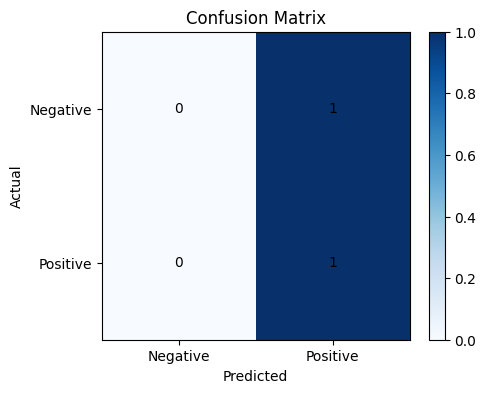

In [13]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0,1], ["Negative","Positive"])
plt.yticks([0,1], ["Negative","Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i][j], ha='center', va='center', color="black")

plt.show()


## 🧪 Step 9 — Try Model with New Sentences  
We test the model with custom examples.


### 📌 Step 9 — Example Predictions

*Use the trained model to predict sentiment for new unseen sentences.*

In [14]:
examples = [
    "I really love this product!",
    "This is the worst thing I ever bought.",
    "I am so happy and excited!",
    "Feeling sad today."
]

clean_examples = [clean_text(e) for e in examples]
vectorized = tfidf.transform(clean_examples)

model.predict(vectorized)


array(['positive', 'negative', 'positive', 'negative'], dtype=object)

# 🎉 Final Summary — Sentiment Analysis Completed  

| Step | Description |
|------|-------------|
| Data Preprocessing | Cleaned and tokenized text |
| TF–IDF | Converted text → numerical vectors |
| ML Model | Logistic Regression |
| Accuracy |  ⭐ Displayed in output |
| Confusion Matrix | ✔ Visualized |
| Predictions | ✔ Tested on new text |

This completes the **Part-2** of your NLP assignment.
